In this notebook we calculate the transition rate from observed transitions in the rotated double well.

In [1]:
import xarray as xr
import sys
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
import numpy as np

## Opening transition time data

In [19]:
transition_time_dir = '/Users/cfn18/Desktop/Double-Well-SR/Calculating-Transition-Rate/transition-time-data/c2h/'
for file in os.listdir(transition_time_dir):
    da = xr.open_dataset(transition_time_dir + file).to_array()
da.name = 'Transition_Time'
da.attrs = {'alpha':0.0, 'epsilon':1.0} # should really save with this

## Plotting Transition Time Distributions

Text(0.5, 0.98, 'Log Transition Time Density Plot: $\\alpha$ Effect')

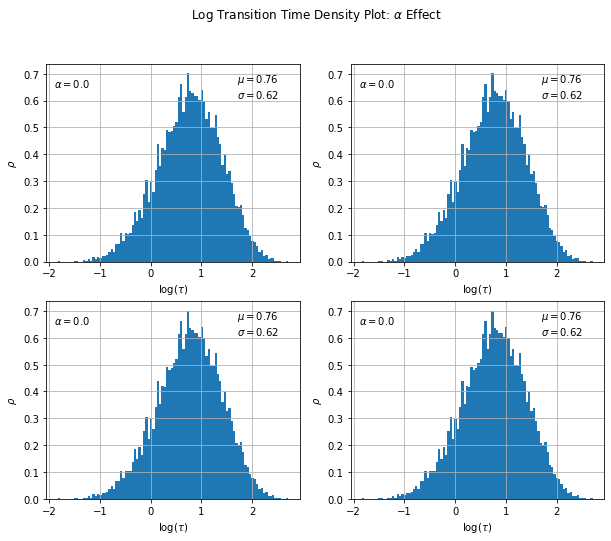

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

data = [da, da, da, da]

ax = axes.flatten()


def log_hist_plot(da, ax):
    log_da = np.log(da)
    count, bins, hist = log_da.plot.hist(density=True, bins=100, ax=ax)
    ax.set_ylabel('$\\rho$')
    ax.set_xlabel('$\\log(\\tau)$')
    ax.grid()
    ax.set_title('')
    ax.text(1.7, 0.61, f'$\\mu =${log_da.mean().item():.2f}\n$\\sigma=${log_da.std().item():.2f}')
    ax.text(-1.9, 0.65, f'$\\alpha =${da.alpha}')
    return

for d, ax in zip(data, axes.flatten()):
    log_hist_plot(d, ax)
    
fig.suptitle('Log Transition Time Density Plot: $\\alpha$ Effect')